# Calculate Arctic Regional atmospheric momentum flux from Rufmod experiments

* **Description**: Reads in and creates regional integrated values from rufmod experiment
* **Input data**: Rufmod output in timeseries format
* **Output data**: Netcdf with processed ice state for all members
* **Creator**: Alice DuVivier
* **Date**: August 2022

The rufmod experiments were performed where the sea ice roughness over Arctic sea ice regions was set to be equal to what it would be over open ocean. This is to better understand ice-atmosphere coupling, processes, and feedbacks.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pop_tools
from datetime import timedelta
import glob
import dask
from matplotlib.gridspec import GridSpec

In [2]:
# list the variables to load
var_in_1 = 'SHFLX'
var_in_2 = 'LHFLX'


## Load rufmod experiments

In [3]:
# Load "rufmod" data
#choose cases and data paths
case1 = 'b.e21.BSSP370.f09_g17.rufmod.001'
case2 = 'b.e21.BSSP370.f09_g17.rufmod.002'
case3 = 'b.e21.BSSP370.f09_g17.rufmod.003'
case4 = 'b.e21.BSSP370.f09_g17.rufmod.004'
case5 = 'b.e21.BSSP370.f09_g17.rufmod.005'

# set base directory where all data live
data_dir = '/glade/campaign/cesm/development/pcwg/projects/arctic_cyclones/rufmod_expts/'
# set individual data directories
data_dir1 = data_dir+case1+'/atm/proc/tseries/month_1/'
data_dir2 = data_dir+case2+'/atm/proc/tseries/month_1/'
data_dir3 = data_dir+case3+'/atm/proc/tseries/month_1/'
data_dir4 = data_dir+case4+'/atm/proc/tseries/month_1/'
data_dir5 = data_dir+case5+'/atm/proc/tseries/month_1/'

In [4]:
%%time
#reading in files
ds1_1 = []
ds2_1 = []
ds3_1 = []
ds4_1 = []
ds5_1 = []

print("loading "+var_in_1)   
my_files=sorted(glob.glob(data_dir1+case1+'.cam.h0.'+var_in_1+'.*.nc'))
ds1_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir2+case2+'.cam.h0.'+var_in_1+'.*.nc'))
ds2_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir3+case3+'.cam.h0.'+var_in_1+'.*.nc'))
ds3_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')    
my_files=sorted(glob.glob(data_dir4+case4+'.cam.h0.'+var_in_1+'.*.nc'))
ds4_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir5+case5+'.cam.h0.'+var_in_1+'.*.nc'))
ds5_1=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')

#reading in files
ds1_2 = []
ds2_2 = []
ds3_2 = []
ds4_2 = []
ds5_2 = []

print("loading "+var_in_2)   
my_files=sorted(glob.glob(data_dir1+case1+'.cam.h0.'+var_in_2+'.*.nc'))
ds1_2=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir2+case2+'.cam.h0.'+var_in_2+'.*.nc'))
ds2_2=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir3+case3+'.cam.h0.'+var_in_2+'.*.nc'))
ds3_2=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')    
my_files=sorted(glob.glob(data_dir4+case4+'.cam.h0.'+var_in_2+'.*.nc'))
ds4_2=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')
my_files=sorted(glob.glob(data_dir5+case5+'.cam.h0.'+var_in_2+'.*.nc'))
ds5_2=xr.open_mfdataset(my_files,combine='by_coords',chunks={}, parallel=True, compat='override', coords='minimal')


loading SHFLX
loading LHFLX
CPU times: user 898 ms, sys: 103 ms, total: 1 s
Wall time: 4.88 s


In [5]:
futures_1 = xr.concat([ds1_1,ds2_1,ds3_1,ds4_1,ds5_1],dim='member_id')
futures_2 = xr.concat([ds1_2,ds2_2,ds3_2,ds4_2,ds5_2],dim='member_id')

In [6]:
futures_1.member_id.values
futures_2.member_id.values

# assign member_id as coordinate array
futures_1.assign_coords({"member_id": futures_1.member_id.values})
futures_2.assign_coords({"member_id": futures_2.member_id.values})

<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, member_id: 5, time: 1032, nbnd: 2, lon: 288, lev: 32, ilev: 33)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00
  * member_id     (member_id) int64 0 1 2 3 4
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (member_id, time, zlon, nbnd) float64 dask.array<chunksize=(1, 600, 1, 2), meta=np.ndarray>
    gw            (member_id, time, lat) float64 dask.array<chunksize=(1, 600, 192), meta=np.ndarray>
    hyam          (member_id, time, lev) float64 dask.array<chunksize=(1, 600, 32), meta=np.ndarray>
    hybm          (member_id, time, lev) float64 dask.array<chunksize=(1, 600, 32), meta=np.ndarray>
    P0            (member_id, time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    hyai          (member_id, time, ilev) float64 dask.array<chunksize=(1, 600, 33), meta=np.ndarray>
    ...            ...
    n2ovmr        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    f11vmr        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    f12vmr        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    sol_tsi       (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    nsteph        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    LHFLX         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BSSP370.f09_g17.rufmod.001
    logname:           duvivier
    host:              cheyenne3
    initial_file:      b.e21.BHIST.f09_g17.CMIP6-historical.rufmod.cam.i.2015...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [7]:
ds_all_1 = futures_1
ds_all_2 = futures_2

# assign member_id as coordinate array
ds_all_1.assign_coords({"member_id": ds_all_1.member_id.values})
ds_all_2.assign_coords({"member_id": ds_all_2.member_id.values})

<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, member_id: 5, time: 1032, nbnd: 2, lon: 288, lev: 32, ilev: 33)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 2015-02-01 00:00:00 ... 2101-01-01 00:00:00
  * member_id     (member_id) int64 0 1 2 3 4
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (member_id, time, zlon, nbnd) float64 dask.array<chunksize=(1, 600, 1, 2), meta=np.ndarray>
    gw            (member_id, time, lat) float64 dask.array<chunksize=(1, 600, 192), meta=np.ndarray>
    hyam          (member_id, time, lev) float64 dask.array<chunksize=(1, 600, 32), meta=np.ndarray>
    hybm          (member_id, time, lev) float64 dask.array<chunksize=(1, 600, 32), meta=np.ndarray>
    P0            (member_id, time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    hyai          (member_id, time, ilev) float64 dask.array<chunksize=(1, 600, 33), meta=np.ndarray>
    ...            ...
    n2ovmr        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    f11vmr        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    f12vmr        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    sol_tsi       (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    nsteph        (member_id, time) float64 dask.array<chunksize=(1, 600), meta=np.ndarray>
    LHFLX         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BSSP370.f09_g17.rufmod.001
    logname:           duvivier
    host:              cheyenne3
    initial_file:      b.e21.BHIST.f09_g17.CMIP6-historical.rufmod.cam.i.2015...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [8]:
ds_all_1['time'] = ds_all_1.time_bnds.load().mean(dim='nbnd').sel(member_id=0)
ds_all_2['time'] = ds_all_2.time_bnds.load().mean(dim='nbnd').sel(member_id=0)

In [9]:
var_1 = ds_all_1[var_in_1]
var_2 = ds_all_2[var_in_2]

In [10]:
# calculate total turbulent surface flux from both inputs
var = var_1 + var_2

## Mask Arctic Ocean only

In [11]:
ds_masks = xr.open_mfdataset('/glade/p/cgd/ppc/duvivier/cesm2_arctic_cyclones/rufmod_analysis/version_5/mask_plots/ATM_MASK_ArcOc.nc')


In [12]:
my_mask = ds_masks['atm_ArcOc_mask']

In [13]:
my_mask

<xarray.DataArray 'atm_ArcOc_mask' (lat: 192, lon: 288)>
dask.array<open_dataset-da90c46d10fd21b010e08c82e53c0a7aatm_ArcOc_mask, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

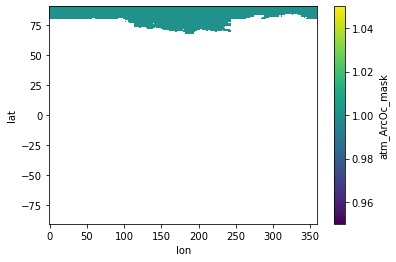

In [14]:
my_mask.plot()

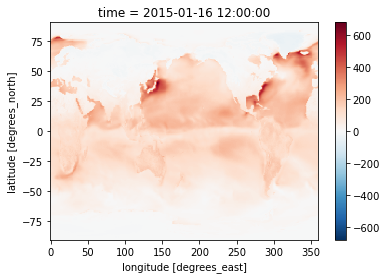

In [15]:
# check data
var.sel(member_id=0).isel(time=0).plot()

In [16]:
#mask just NH cap
var_masked = var.where(my_mask==1)

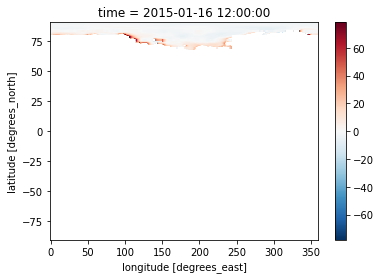

In [17]:
#just test that it worked properly
var_masked.sel(member_id=0).isel(time=0).plot()

In [18]:
#just test that it worked properly
var_masked.sel(member_id=0).isel(time=0).values

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.611228 , -1.605503 , -1.6035147, ..., -1.68492  , -1.6543776,
        -1.6280049],
       [-1.9791106, -1.9729731, -1.9674327, ..., -2.001689 , -1.9936514,
        -1.9860227],
       [-2.5082922, -2.5093954, -2.5103812, ..., -2.5041401, -2.505681 ,
        -2.507059 ]], dtype=float32)

## Calculate regional averages

Just average over everything we have not masked out

In [19]:
avg = var_masked.mean(dim=['lat','lon'])

In [20]:
# set some values for the data
longname = 'Total turbulent surface heat flux'
units = var_1.units

In [21]:
units

'W/m2'

### Actually load the data now

Before, all the calculations were "lazy" version

In [22]:
%%time
## slow step
avg.load()

CPU times: user 10 s, sys: 4.21 s, total: 14.2 s
Wall time: 18.7 s


<xarray.DataArray (member_id: 5, time: 1032)>
array([[ 1.2052994 , -0.4008466 ,  0.42673856, ..., 24.314396  ,
        36.50604   , 37.32305   ],
       [ 0.7433298 ,  1.0171924 ,  0.5275157 , ..., 22.301811  ,
        37.940666  , 31.979162  ],
       [ 1.2860394 ,  0.7148902 ,  2.6621435 , ..., 19.043657  ,
        33.358833  , 39.63199   ],
       [ 0.10571656,  1.0694463 ,  1.8042475 , ..., 23.424309  ,
        32.723362  , 45.999546  ],
       [ 0.972018  , -0.95233727,  3.2075884 , ..., 25.847366  ,
        31.641642  , 36.947517  ]], dtype=float32)
Coordinates:
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Dimensions without coordinates: member_id

In [23]:
# assign member_id as coordinate array
avg['member_id'] = avg.member_id.values

In [24]:
avg.coords

Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id  (member_id) int64 0 1 2 3 4

In [25]:
avg

<xarray.DataArray (member_id: 5, time: 1032)>
array([[ 1.2052994 , -0.4008466 ,  0.42673856, ..., 24.314396  ,
        36.50604   , 37.32305   ],
       [ 0.7433298 ,  1.0171924 ,  0.5275157 , ..., 22.301811  ,
        37.940666  , 31.979162  ],
       [ 1.2860394 ,  0.7148902 ,  2.6621435 , ..., 19.043657  ,
        33.358833  , 39.63199   ],
       [ 0.10571656,  1.0694463 ,  1.8042475 , ..., 23.424309  ,
        32.723362  , 45.999546  ],
       [ 0.972018  , -0.95233727,  3.2075884 , ..., 25.847366  ,
        31.641642  , 36.947517  ]], dtype=float32)
Coordinates:
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * member_id  (member_id) int64 0 1 2 3 4

### Plot just to check

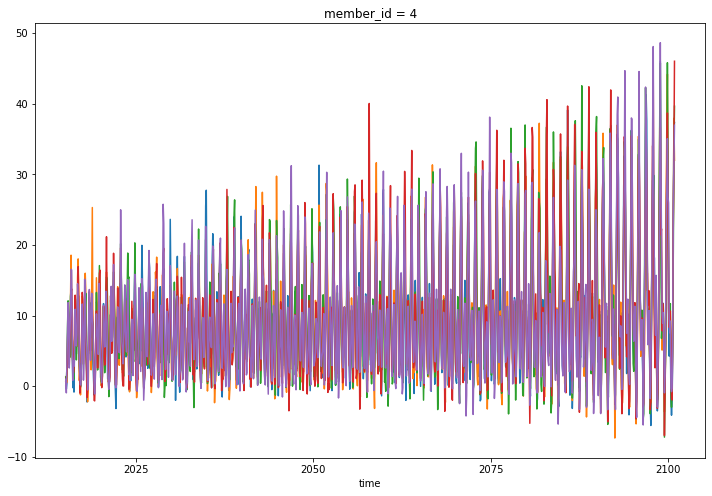

In [26]:
import nc_time_axis
# Setup the figure
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

# Loop through and plot each member_id all months in 251 years
for member_id in avg.member_id.values:
    avg.sel(member_id=member_id).plot(ax=ax, label=member_id)

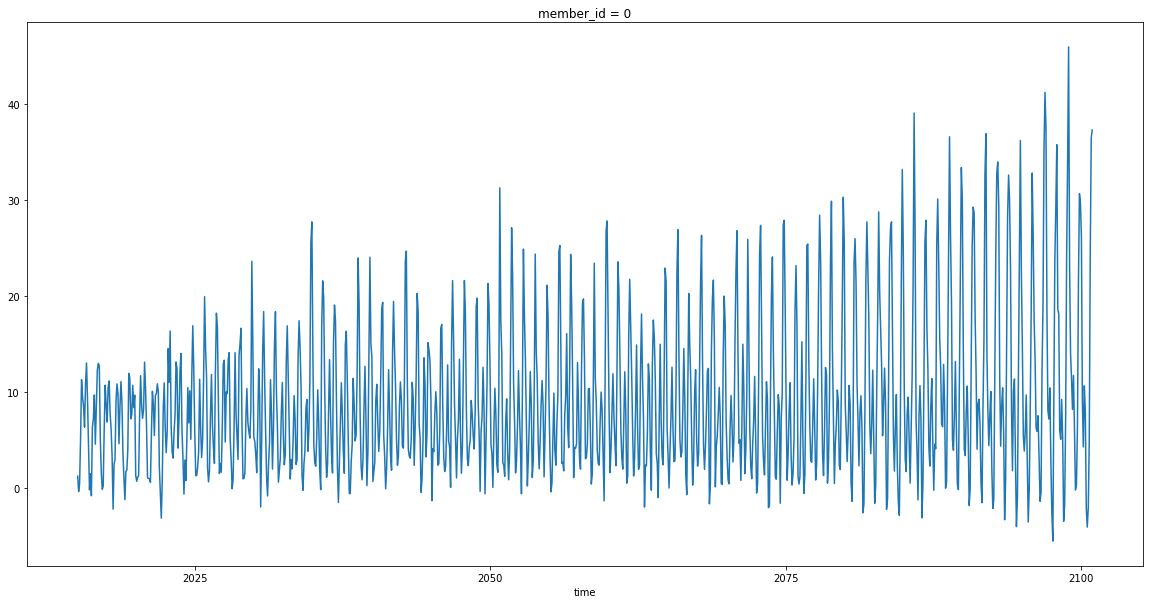

In [27]:
# Setup the figure
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot(111)

# Plot just one to check
avg.sel(member_id=0).plot(ax=ax, label='ens')

### Save the timeseries

In [28]:
fout = 'rufmod_all_transient_regional_avg_TURBFLX'

In [29]:
avg.time.values

array([cftime.DatetimeNoLeap(2015, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2100, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)

In [30]:
ds_to_save = xr.Dataset({'regional_avg': (['member_id','time'], avg.data)},
                        coords={'member_id':(['member_id'],avg.member_id.values),
                               'time':(['time'],avg.time.values)},
                        attrs={'Author': 'Alice DuVivier', 'units':units, 'longname':longname})

In [31]:
# double check dataset we plan to save
ds_to_save

<xarray.Dataset>
Dimensions:       (member_id: 5, time: 1032)
Coordinates:
  * member_id     (member_id) int64 0 1 2 3 4
  * time          (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Data variables:
    regional_avg  (member_id, time) float32 1.205 -0.4008 0.4267 ... 31.64 36.95
Attributes:
    Author:    Alice DuVivier
    units:     W/m2
    longname:  Total turbulent surface heat flux

In [32]:
ds_to_save.to_netcdf(fout+'.nc')  # how to save file